In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

% matplotlib inline

import sys
sys.path.append("..")

import rascals

In [2]:
rascals.setupOorb()

In [3]:
database = "../data/msst_survey.db"
con = sql.connect(database)

In [4]:
survey = pd.read_sql("""SELECT * FROM observations 
                              JOIN oorbOrbitCat ON observations.designation=oorbOrbitCat.designation""", con)

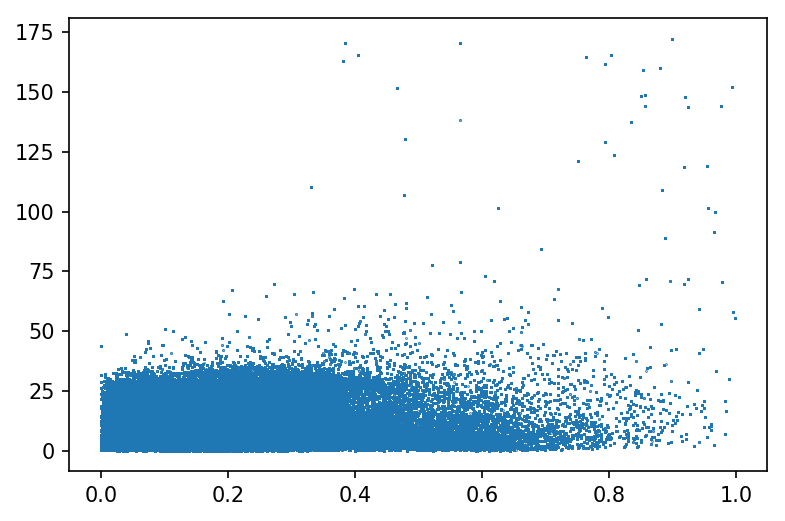

In [5]:
fig, ax = plt.subplots(1, 1, dpi=150)
ax.scatter(*survey[["e", "i_deg"]].values.T, s=0.1)

In [6]:
observations = pd.read_sql("""SELECT * FROM observations 
                              JOIN oorbOrbitCat ON observations.designation=oorbOrbitCat.designation
                              WHERE visitId = 1""", con)

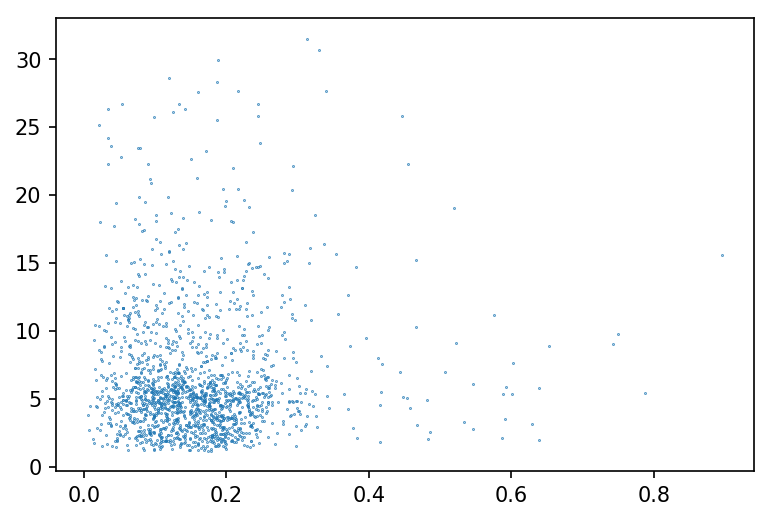

In [7]:
fig, ax = plt.subplots(1, 1, dpi=150)
ax.scatter(*observations[["e", "i_deg"]].values.T, s=0.1)

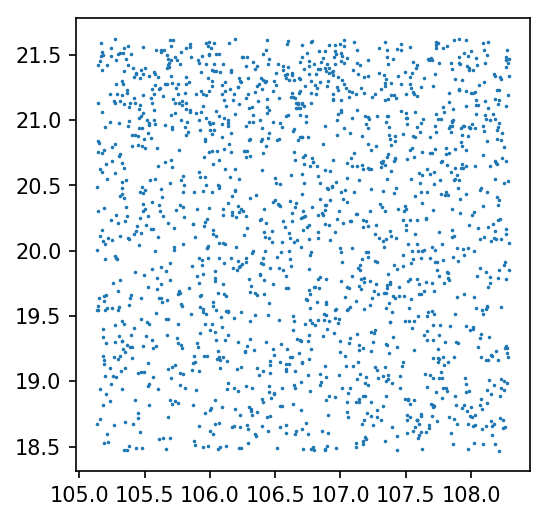

In [8]:
fig, ax = plt.subplots(1, 1, dpi=150)
ax.scatter(*observations[["RA_deg", "Dec_deg"]].values.T, s=0.5)
ax.set_aspect("equal")

In [9]:
observationColumns = {"obs_id" : "obsId",
                      "visit_id" : "visitId",
                      "field_id" : "fieldId",
                      "field_RA_deg" : "fieldRA_deg",
                      "field_Dec_deg" : "fieldDec_deg",
                      "exp_mjd" : "exp_mjd",
                      "night": "night",
                      "RA_deg" : "RA_deg",
                      "Dec_deg" : "Dec_deg",
                      "obs_x_au" : "HEclObsy_X_au",
                      "obs_y_au" : "HEclObsy_Y_au",
                      "obs_z_au" : "HEclObsy_Z_au",
                      "mag" : "VMag"}
    
truthColumns = {"name" : "designation",
                "Delta_au" : "Delta_au",
                "r_au" : "r_au",
                "obj_x_au" :"HEclObj_X_au",
                "obj_y_au" : "HEclObj_Y_au",
                "obj_z_au" : "HEclObj_Z_au",
                "obj_dx/dt_au_p_day" : "HEclObj_dX/dt_au_p_day",
                "obj_dy/dt_au_p_day" : "HEclObj_dY/dt_au_p_day",
                "obj_dz/dt_au_p_day" : "HEclObj_dZ/dt_au_p_day"}

In [10]:
pointings = pd.read_csv("../data/survey.txt", sep=" ", index_col=False)

In [11]:
pointings

,visitId,fieldId,exp_mjd,night,fieldRA_deg,fieldDec_deg
0,1,1,59739.937500,59740,106.712809,20.041638
1,2,2,59739.938194,59740,106.712809,16.879360
2,3,3,59739.938889,59740,106.712809,13.717082
3,4,4,59739.939583,59740,106.712809,10.554805
4,5,5,59739.940278,59740,106.712809,7.392527
5,6,6,59739.940972,59740,106.712809,4.230249
6,7,7,59739.941667,59740,106.712809,1.067972
7,8,8,59739.942361,59740,106.712809,-2.094306
8,9,9,59739.943056,59740,106.712809,-5.256584
9,10,10,59739.943750,59740,106.712809,-8.418861


In [12]:
def addDiffImNoise(survey, 
                   meanPerSquareDegree, 
                   sigmaPerSquareDegree, 
                   fieldShape="square", 
                   fieldArea=10, 
                   observationColumns=observationColumns,
                   truthColumns=truthColumns,
                   noiseName="NS"):
    
    visits = survey[[observationColumns["visit_id"], 
                     observationColumns["exp_mjd"],
                     observationColumns["night"],
                     observationColumns["field_RA_deg"], 
                     observationColumns["field_Dec_deg"]]].drop_duplicates(keep="first").values
    num_noise = np.random.normal(loc=meanPerSquareDegree * fieldArea, scale=sigmaPerSquareDegree * fieldArea, size=len(visits)).astype(int)
    noise_array = np.zeros([np.sum(num_noise), 5])
   
    
    index = 0
    for visit, noise in zip(visits, num_noise):
        center = visit[3:5]
                     
        if fieldShape == "square":
            half_side = np.sqrt(fieldArea) / 2  
            noise_array[index:index+noise, 0] = np.ones(noise) * visit[0]
            noise_array[index:index+noise, 1] = np.ones(noise) * visit[1]
            noise_array[index:index+noise, 2] = np.ones(noise) * visit[2]
            noise_array[index:index+noise, 3] = np.random.uniform(low=center[0] - half_side, high=center[0] + half_side, size=noise)
            noise_array[index:index+noise, 4] = np.random.uniform(low=center[1] - half_side, high=center[1] + half_side, size=noise)
            
        index += noise
    
    noise_df = pd.DataFrame(noise_array, columns=[observationColumns["visit_id"], 
                                                  observationColumns["exp_mjd"],
                                                  observationColumns["night"],
                                                  observationColumns["RA_deg"], 
                                                  observationColumns["Dec_deg"]])
    
    noise_df[truthColumns["name"]] = [noiseName for i in range(len(noise_df))]
    noise_df[observationColumns["visit_id"]] = noise_df[observationColumns["visit_id"]].astype(int)  
    noise_df[observationColumns["night"]] = noise_df[observationColumns["night"]].astype(int)
    return noise_df
        

In [13]:
noise50 = addDiffImNoise(pointings, 50, 5)

In [14]:
noise50.to_csv("../data/msst_survey_noise_50_5.txt", sep=" ", index=False)

In [16]:
noise50.to_sql("noise_50", con, if_exists="replace", index=False)

In [17]:
noise100 = addDiffImNoise(pointings, 100, 10)

In [18]:
noise100.to_csv("../data/msst_survey_noise_100_10.txt", sep=" ", index=False)

In [19]:
noise100.to_sql("noise_100", con, if_exists="replace", index=False)

In [20]:
noise200 = addDiffImNoise(pointings, 200, 20)

In [21]:
noise200.to_csv("../data/msst_survey_noise_200_20.txt", sep=" ", index=False)

In [22]:
noise200.to_sql("noise_200", con, if_exists="replace", index=False)

In [23]:
noise300 = addDiffImNoise(pointings, 300, 30)

In [24]:
noise300.to_csv("../data/msst_survey_noise_300_30.txt", sep=" ", index=False)

In [25]:
noise300.to_sql("noise_300", con, if_exists="replace", index=False)

In [28]:
noise400 = addDiffImNoise(pointings, 400, 40)

In [29]:
noise400.to_csv("../data/msst_survey_noise_400_40.txt", sep=" ", index=False)

In [30]:
noise400.to_sql("noise_400", con, if_exists="replace", index=False)

In [31]:
con.commit()
con.close()

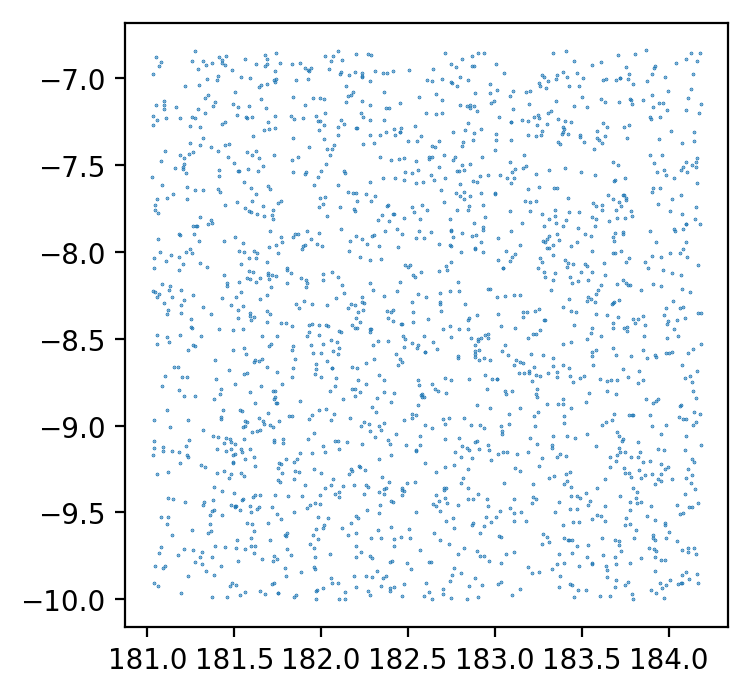

In [14]:
fig, ax = plt.subplots(1, 1, dpi=200)
ax.scatter(*noise[noise["visitId"] == 490][["RA_deg", "Dec_deg"]].values.T, s=0.1)
ax.set_aspect("equal")